In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv('IMDb_Movies_India.csv',encoding='latin1')

In [ ]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
df.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [ ]:
df=df.dropna(subset=['Rating'])

In [ ]:
df['Votes']=df['Votes'].str.replace(',','').astype(float)

In [ ]:
df['Year']=df['Year'].str.extract('(\d{4})').astype(float)

In [ ]:
df['Duration']=df['Duration'].str.extract('(\d+)').astype(float)

In [ ]:
df['Genre']=df['Genre'].str.split(',').str[0]

In [ ]:
df[['Director','Actor 1','Actor 2','Actor 3']]=df[['Director','Actor 1','Actor 2','Actor 3']].fillna('Unknown')

In [ ]:
df['Actor_Count']=df[['Actor 1','Actor 2','Actor 3']].notnull().sum(axis=1)

In [ ]:
top_directors=df['Director'].value_counts().nlargest(10).index
df['Top_Director']=df['Director'].apply(lambda x:1 if x in top_directors else 0 )

In [ ]:
df.drop(['Actor 2','Actor 3'],axis=1,inplace=True)

In [ ]:
genre_counts = df['Genre'].value_counts().to_dict()
df['Genre_Frequency'] = df['Genre'].map(genre_counts)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7919 entries, 1 to 15508
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             7919 non-null   object 
 1   Year             7919 non-null   float64
 2   Duration         5851 non-null   float64
 3   Genre            7817 non-null   object 
 4   Rating           7919 non-null   float64
 5   Votes            7919 non-null   float64
 6   Director         7914 non-null   object 
 7   Actor 1          7794 non-null   object 
 8   Actor_Count      7919 non-null   int64  
 9   Top_Director     7919 non-null   int64  
 10  Genre_Frequency  7817 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 742.4+ KB


In [ ]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor_Count,Top_Director,Genre_Frequency
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,3,0,2532.0
3,#Yaaram,2019.0,110.0,Comedy,4.4,35.0,Ovais Khan,Prateik,3,0,1190.0
5,...Aur Pyaar Ho Gaya,1997.0,147.0,Comedy,4.7,827.0,Rahul Rawail,Bobby Deol,3,0,1190.0
6,...Yahaan,2005.0,142.0,Drama,7.4,1086.0,Shoojit Sircar,Jimmy Sheirgill,3,0,2532.0
8,?: A Question Mark,2012.0,82.0,Horror,5.6,326.0,Allyson Patel,Yash Dave,3,0,188.0


In [ ]:
print(df.columns)

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor_Count', 'Top_Director', 'Genre_Frequency'],
      dtype='object')


In [ ]:
X=df.drop(columns=['Name','Genre','Director','Actor 1','Rating'])
y=df['Rating']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
model=RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
print("MSE:",mean_squared_error(y_test,y_pred))
print("R2 Score",r2_score(y_test,y_pred))

MSE: 1.3264867697517049
R2 Score 0.2865071474230033


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
importances=model.feature_importances_
features=X.columns

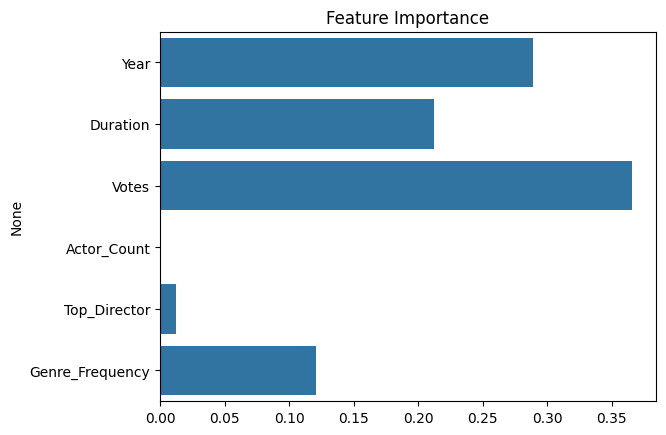

In [ ]:
sns.barplot(x=importances,y=features)
plt.title('Feature Importance')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores=cross_val_score(model,X,y,cv=5,scoring='r2')
print("Cross-validated R2 scores",scores)
print("Average CV R2",np.mean(scores))

Cross-validated R2 scores [0.29166527 0.29490737 0.25929508 0.26425726 0.24306574]
Average CV R2 0.2706381443525199
